# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#E31837"><b>GETTING STARTED</b></div>

In this analysis, we explore a dataset containing information on various transactions, including `Store_Area`, `Items_Available`, `Daily_Customer_Count`, and `Store_Sales`. Our primary goal is to predict the `Store_Sales` variable, which represents sales revenue.

![](https://cdn.winsightmedia.com/platform/files/public/inline-images/Wegmans%20frozen%20aisle-Carlyle%20VA%20store.jpg?VersionId=Qrt.58QNWKyL5qVVZNrlYdiuH4Hvocd1)

# <div style="padding: 30px;color:white;margin:10;font-size:65%;text-align:left;display:fill;border-radius:15px;background-color:#FFFFFF;overflow:hidden;background-color:#E31837"><b>INTRODUCTION</b></div>

For retailers, forecasting store sales is crucial since it aids in the management of their inventory, personnel, and marketing initiatives. In this project, we aim to anticipate how much a business would sell by looking at a dataset with information about stores, such as their size, available merchandise, and daily customer count. 
We compare how well each model performs using a variety of models, including **Linear Regression**, **Ridge Regression**, **Lasso Regression**, **Decision Tree**, and **Random Foresight**.

### <b><span style='color:#E31837'>|</span> Import liabraries and loading data</b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

In [2]:
# Load and preprocess the data
data = pd.read_csv('../input/stores-area-and-sales-data/Stores.csv')
#set number format
pd.options.display.float_format = '{:.2f}'.format #Limiting floats output to 2 decimal points

In [3]:
#check DATA columns
data.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [4]:
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [5]:
# Drop the Store ID column
data = data.drop('Store ID ', axis=1)

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#E31837"><b><span style='color:#FFFFFF'>1.</span></b> <b>EXPLORATORY DATA NALYSIS</b></div>

#### <b><span style='color:#E31837'> 1.1) </span> Describe the Data</b>

In [6]:
data.head().T

,0,1,2,3,4
Store_Area,1659,1461,1340,1451,1770
Items_Available,1961,1752,1609,1748,2111
Daily_Customer_Count,530,210,720,620,450
Store_Sales,66490,39820,54010,53730,46620


In [7]:
print(data.shape)
print(data.dtypes)
print(data.describe())

(896, 4)
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object
       Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
count      896.00           896.00                896.00       896.00
mean      1485.41          1782.04                786.35     59351.31
std        250.24           299.87                265.39     17190.74
min        775.00           932.00                 10.00     14920.00
25%       1316.75          1575.50                600.00     46530.00
50%       1477.00          1773.50                780.00     58605.00
75%       1653.50          1982.75                970.00     71872.50
max       2229.00          2667.00               1560.00    116320.00


#### **<span style='color:#E31837'>The summary statistics provide some insights into the distribution of each variable in the dataset:</span>**

* `Store_Area` has a **mean of 1485.41 and a standard deviation of 250.24**, indicating that the store areas are relatively consistent in size, with most stores falling within a range of plus or minus 250 square units of the mean.

* `Items_Available` has a **mean of 1782.04 and a standard deviation of 299.87**, indicating that there is some variation in the number of items available, but most stores have a similar number of items available.

* `Daily_Customer_Count` has a **mean of 786.35 and a standard deviation of 265.39**, indicating that there is some variation in the number of customers that visit the store each day.

* `Store_Sales` has a **mean of 59351.31 and a standard deviation of 17190.74**, indicating that there is some variation in store sales, with some stores making more sales than others.

#### <b><span style='color:#E31837'> 1.2) </span> Box plots and swarm plots</b>

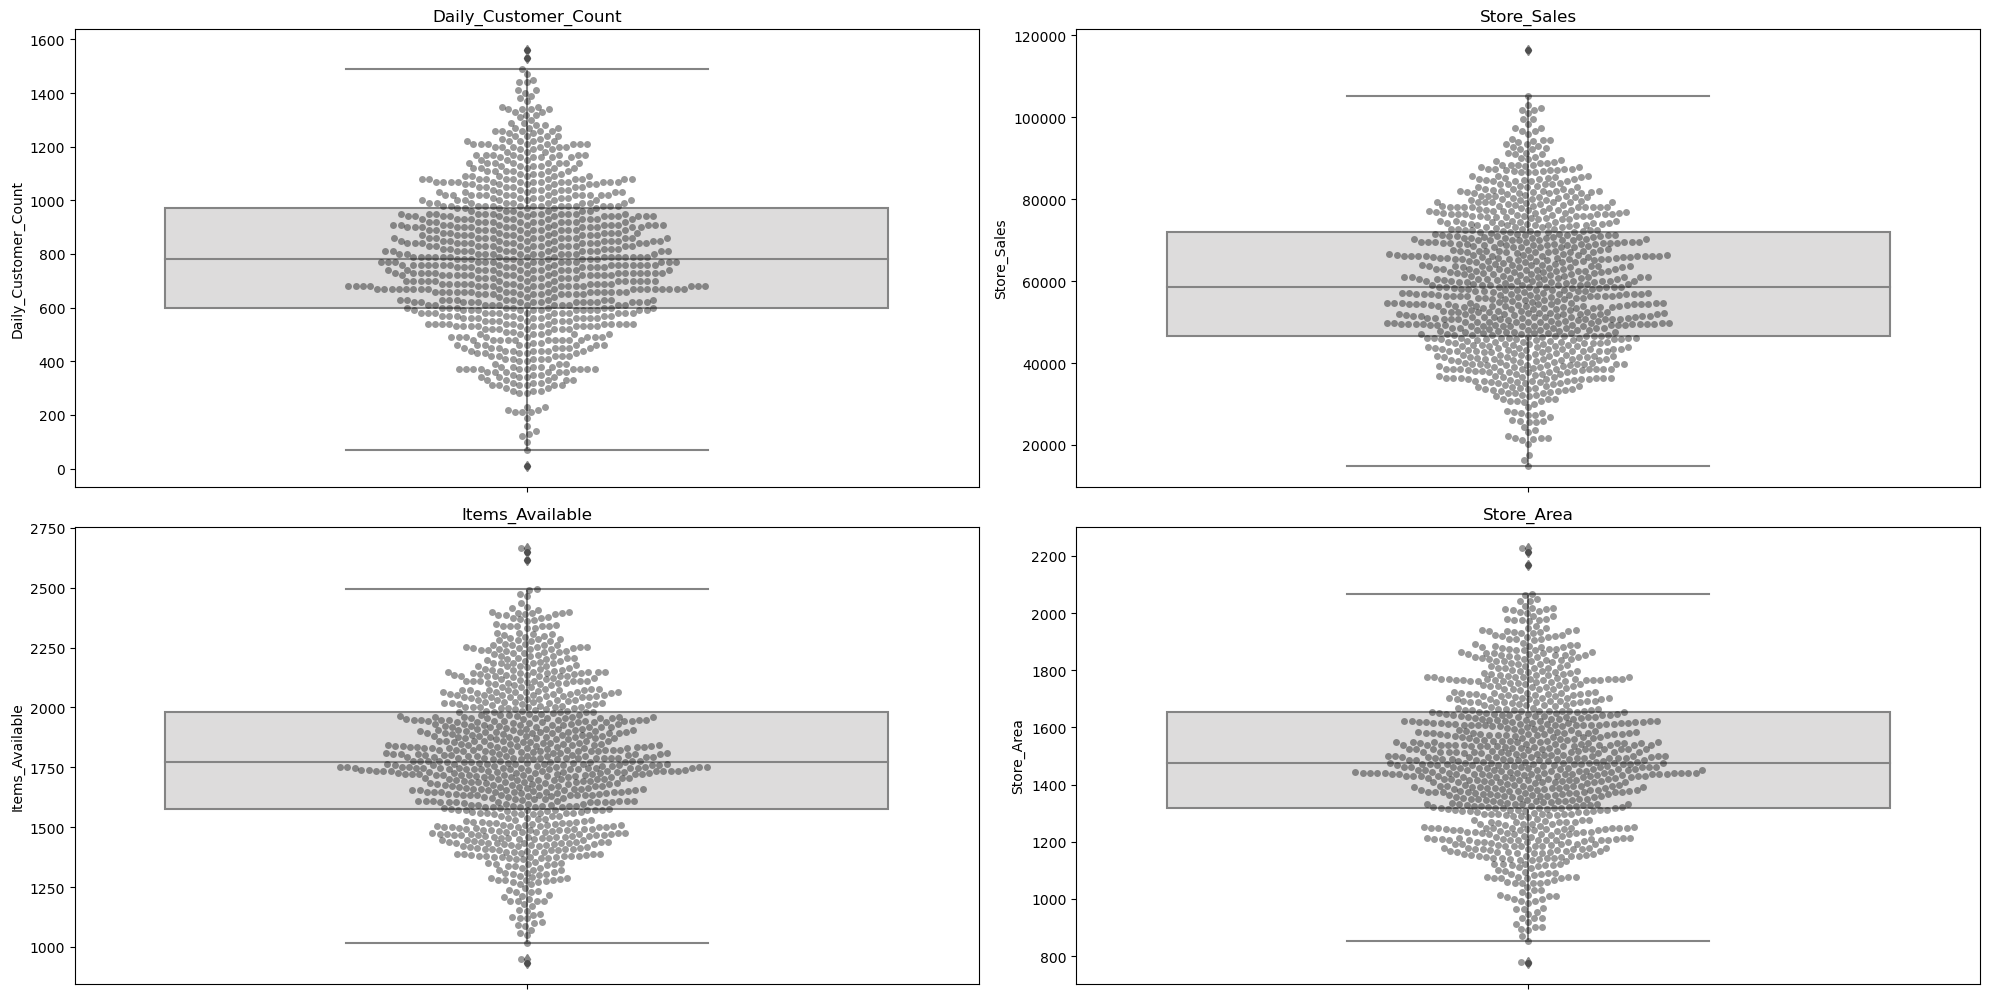

In [8]:
# Box plots and swarm plots
columns = ['Daily_Customer_Count', 'Store_Sales', 'Items_Available', 'Store_Area']

plt.figure(figsize=(20, 20))
for i, column in enumerate(columns):
    plt.subplot(len(columns), 2, i + 1)
    sns.boxplot(y=column, data=data, palette='coolwarm')
    sns.swarmplot(y=column, data=data, color='black', alpha=0.4)
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

#### <b><span style='color:#E31837'> 1.3) </span> Check Distribution</b>

Store_Area: mu = 1485.41, sigma = 250.10
Store_Area: Skewness: 0.03
Store_Area: Kurtosis: -0.28


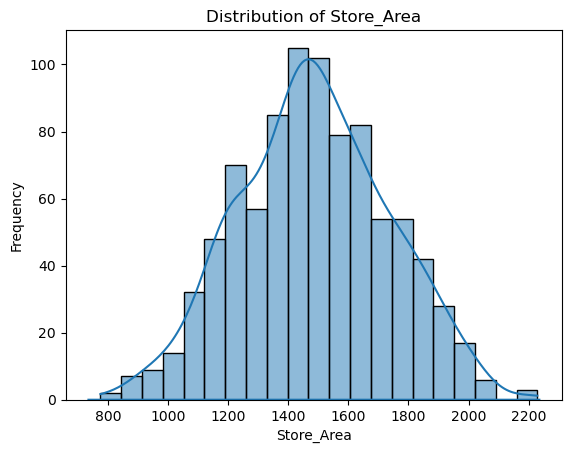

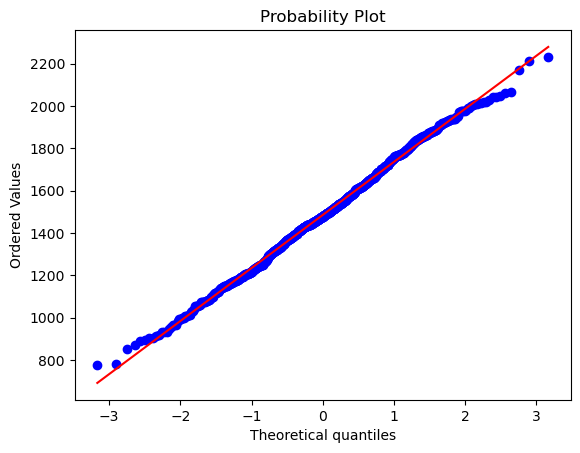

Items_Available: mu = 1782.04, sigma = 299.70
Items_Available: Skewness: 0.03
Items_Available: Kurtosis: -0.28


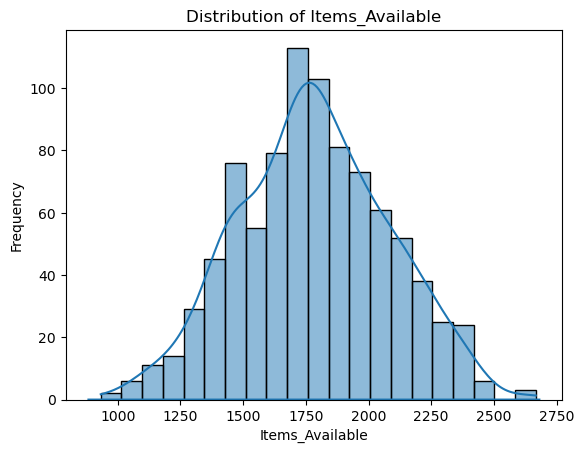

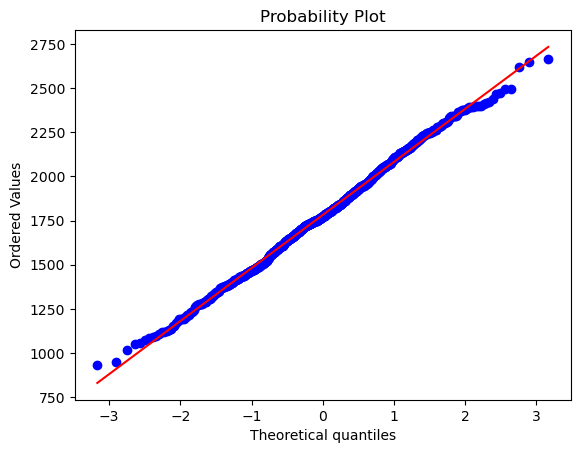

Daily_Customer_Count: mu = 786.35, sigma = 265.24
Daily_Customer_Count: Skewness: 0.07
Daily_Customer_Count: Kurtosis: -0.26


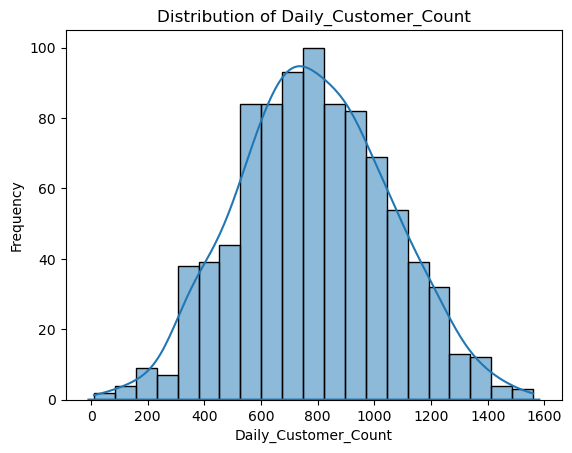

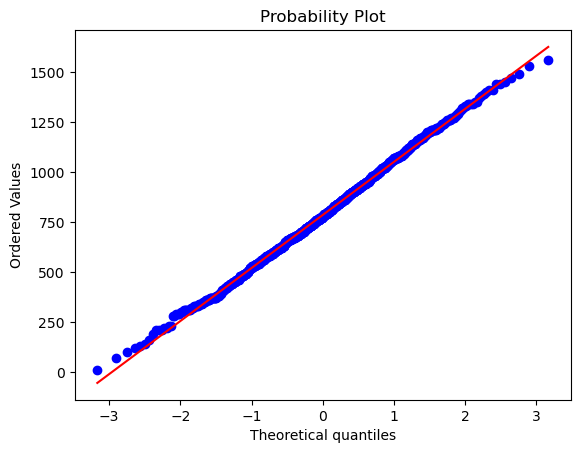

Store_Sales: mu = 59351.31, sigma = 17181.15
Store_Sales: Skewness: 0.15
Store_Sales: Kurtosis: -0.46


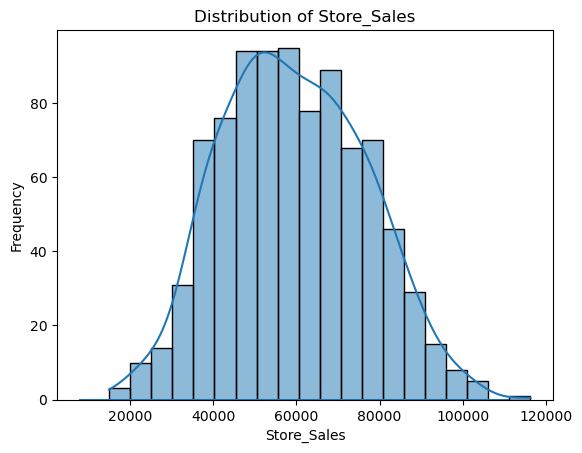

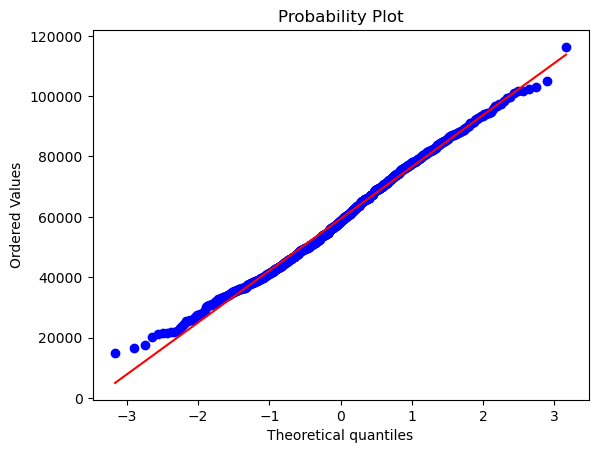

In [9]:
# Create a list of the columns you want to analyze
columns = ['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']

# Loop over the columns and plot the distribution of each variable
for col in columns:
    # Plot the distribution of the data
    sns.histplot(data[col], kde=True)

    # Fit a normal distribution to the data
    (mu, sigma) = stats.norm.fit(data[col])
    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(col, mu, sigma))

    # Calculate the skewness and kurtosis of the data
    print('{}: Skewness: {:.2f}'.format(col, data[col].skew()))
    print('{}: Kurtosis: {:.2f}'.format(col, data[col].kurt()))

    # Add the fitted normal distribution to the plot
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    # Add labels and title to the plot
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'.format(col))

    # Plot the QQ-plot
    fig = plt.figure()
    stats.probplot(data[col], plot=plt)

    plt.show()

`Store_Area`: The mean store area is 1485.41 square units, and the standard deviation is 250.10. This indicates that the store areas are relatively consistent in size, with most falling within a range of plus or minus 250 square units of the mean. However, the data is slightly flat, which means there is not a lot of variation in store area.

`Items_Available`: The mean number of items available in the store is 1782.04, and the standard deviation is 299.70. This indicates that there is some variation in the number of items available, but most stores have a similar number of items available. The data is also slightly flat, indicating that there is not a lot of variation in the number of items available.

`Daily_Customer_Count`: The mean daily customer count is 786.35, and the standard deviation is 265.24. This indicates that there is some variation in the number of customers that visit the store each day, and the data is slightly right-skewed, which means that some stores may have more customers than others.

`Store_Sales`: The mean store sales are 59351.31, and the standard deviation is 17181.15. This indicates that there is some variation in store sales, with some stores making more sales than others. The data is slightly right-skewed, which means that some stores may make more sales than others.

#### <b><span style='color:#E31837'> 1.4) </span> Check correlation</b>

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.00,1.00,-0.04,0.10
Items_Available,1.00,1.00,-0.04,0.10
Daily_Customer_Count,-0.04,-0.04,1.00,0.01
Store_Sales,0.10,0.10,0.01,1.00


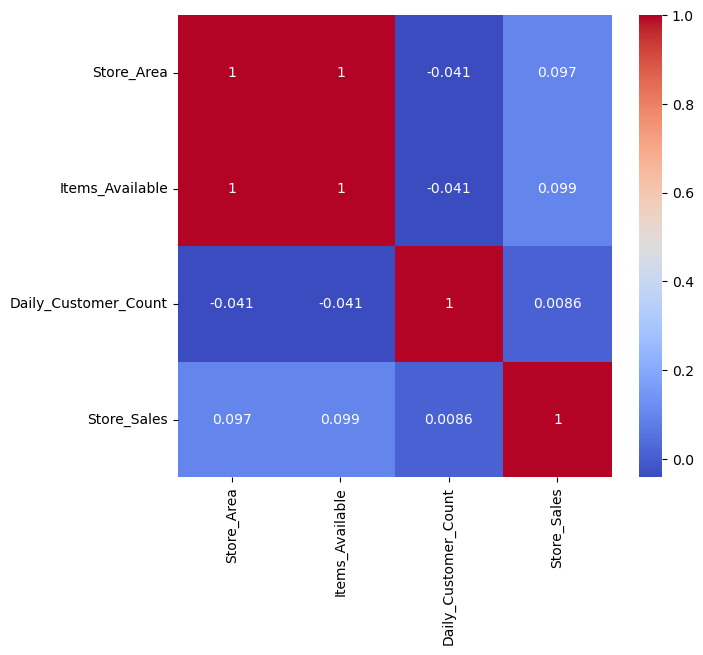

In [10]:
#check correlation
plt.figure(figsize=(7,6))
correlation = data.corr()
sns.heatmap(correlation,cmap="coolwarm",annot=True)
correlation

The correlation matrix shows how strongly each pair of variables in the data is related to each other. A value of 1 means that two variables are perfectly positively correlated, a value of 0 means that there is no correlation, and a value of -1 means that two variables are perfectly negatively correlated.

Looking at the correlation matrix, here are some observations:

* `Store_Area` and `Items_Available` are perfectly positively correlated with each other (correlation coefficient of 1), which makes sense since larger stores can typically hold more items.
* ` Daily_Customer_Count `and`Store_Sales` have a very weak positive correlation (correlation coefficient of 0.01), which suggests that the number of daily customers is not strongly related to the store's sales.
* `Store_Area` and `Store_Sales` have a weak positive correlation (correlation coefficient of 0.10), indicating that larger stores may make slightly more sales.
All variables have very weak correlations with each other, with correlation coefficients between -0.04 and 0.10.

Overall, the correlations between the four variables are weak, meaning that they are not strongly related to each other. This means that we can consider using all four variables in the store sales prediction model without worrying about multicollinearity (which can occur when two or more variables are highly correlated with each other).

#### <b><span style='color:#E31837'> 1.5) </span> Clustering analysis</b>

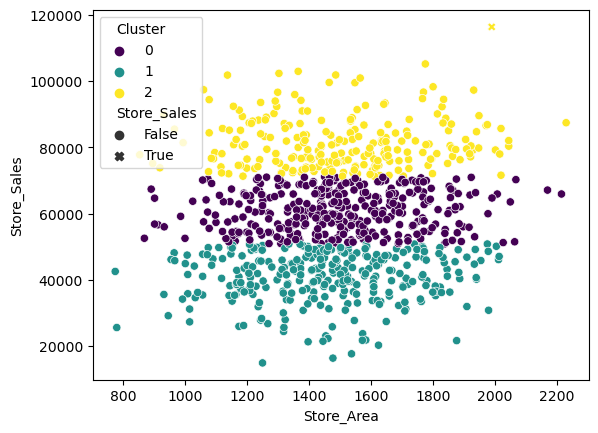

In [11]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))


cluster_data = data[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']]
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(cluster_data)

sns.scatterplot(x='Store_Area', y='Store_Sales', data=data, hue='Cluster', palette='viridis', style=outlier_mask['Store_Sales'])
plt.show()


Clustering analysis helps us understand the relationship between the attributes of stores and their sales. It uses a method called K-means clustering to group stores based on their attributes like store area and daily customer count. The idea is to identify any patterns or groups of stores that could be useful for predicting their sales.

First, the code identifies any outliers in the data that may be skewing the results. It then selects the four most relevant columns of the data and applies the K-means clustering method to group similar stores together. The results are added to the original dataset as a new column called "Cluster."

Finally, the code creates a scatterplot to visualize the relationship between store area and sales. Each point in the plot represents a store, and its color represents the group it belongs to. The plot helps us understand how different groups of stores perform in terms of sales, and whether there is any correlation between their attributes and sales.

By identifying and visualizing any patterns or groups within the data, this code helps us gain insights into the factors that affect store sales.

#### <b><span style='color:#E31837'> 1.6) </span> Joint Plot</b>

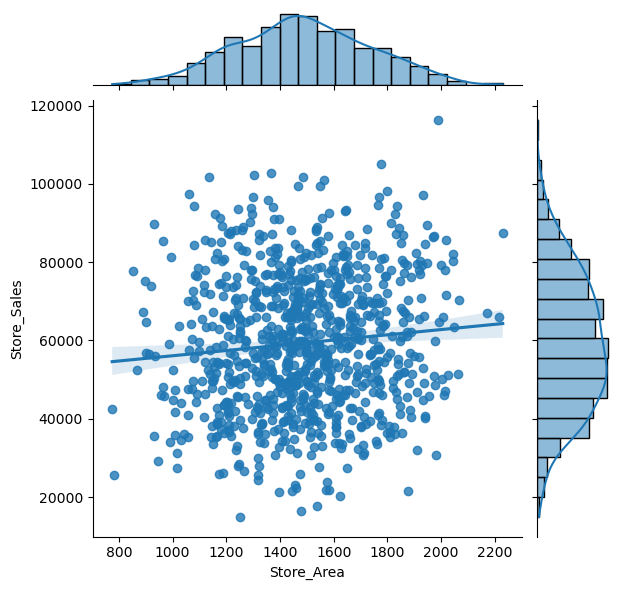

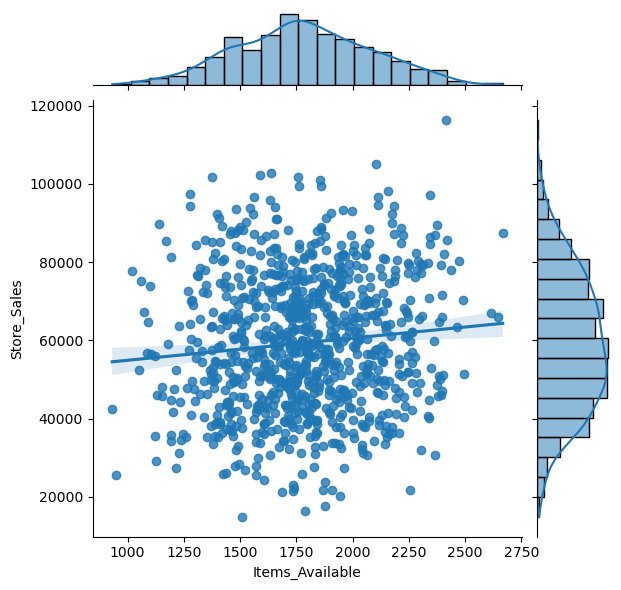

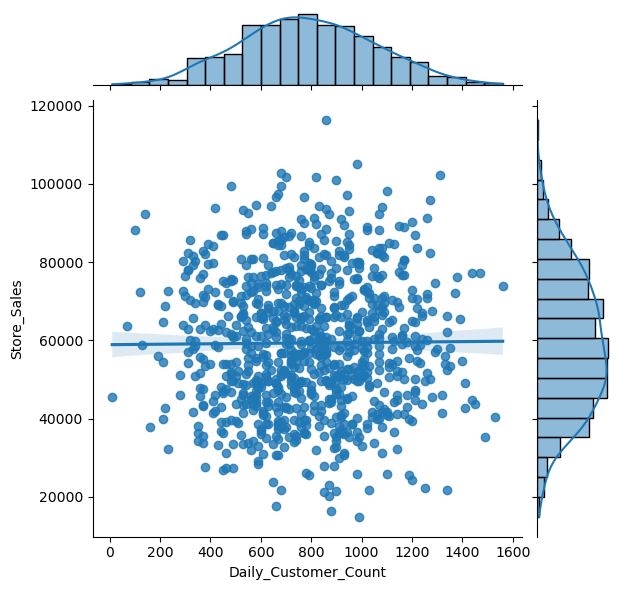

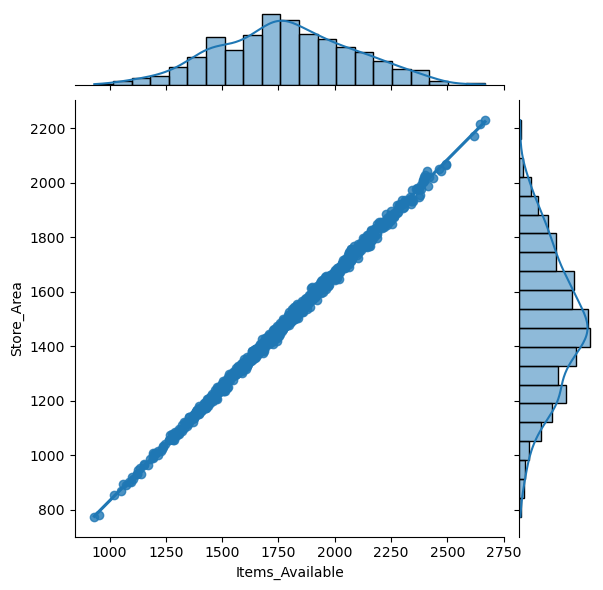

In [12]:
sns.jointplot(x='Store_Area', y='Store_Sales', data=data, kind='reg')
sns.jointplot(x='Items_Available', y='Store_Sales', data=data, kind='reg')
sns.jointplot(x='Daily_Customer_Count', y='Store_Sales', data=data, kind='reg')
sns.jointplot(x='Items_Available', y='Store_Area', data=data, kind='reg')

plt.show()


* The first scatterplot shows the relationship between store area and store sales. The regression line shows a positive correlation between the two variables, which is consistent with the correlation coefficient of 0.10 in the correlation matrix.

* The second scatterplot shows the relationship between items available and store sales. Again, there is a positive correlation between the variables, which is consistent with the correlation coefficient of 0.10.

* The third scatterplot shows the relationship between daily customer count and store sales. In this case, the correlation is very weak (correlation coefficient of 0.01), and the regression line is almost flat, indicating that there is very little relationship between the two variables.

* The fourth scatterplot shows the relationship between items available and store area. As expected, the two variables are perfectly positively correlated (correlation coefficient of 1), and the regression line is a perfect diagonal line.

Overall, these scatterplots help us understand how the different attributes of stores are related to each other and to store sales. The use of linear regression lines helps to visualize the strength and direction of the correlations between the variables, and to identify any potential outliers or unusual patterns in the data. The correlation matrix provides additional information about the strength and direction of the correlations between each pair of variables, which can be used to guide further analysis.


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#E31837"><b><span style='color:#FFFFFF'>2.</span></b> <b>Data Cleansing and Data Prep</b></div>

#### <b><span style='color:#E31837'> 2.1) </span> Check null and Missing Values</b>

In [13]:
# Step 1: check missing ratio
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio


No null in this dataset

#### <b><span style='color:#E31837'> 2.2) </span> Check null and Missing Values</b>

In [14]:
# Step 2: Handle duplicates
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 5)


No duplicate on this dataset

#### <b><span style='color:#E31837'> 2.3) </span> Handling Outliers</b>

Outliers in Store_Area: [2169, 775, 2229, 2214, 780]


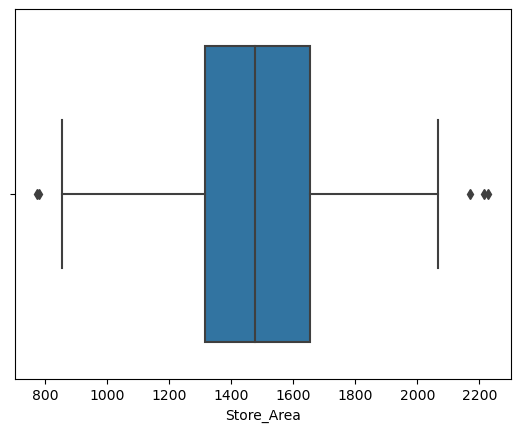

Outliers in Items_Available: [2617, 932, 2667, 2647, 951]


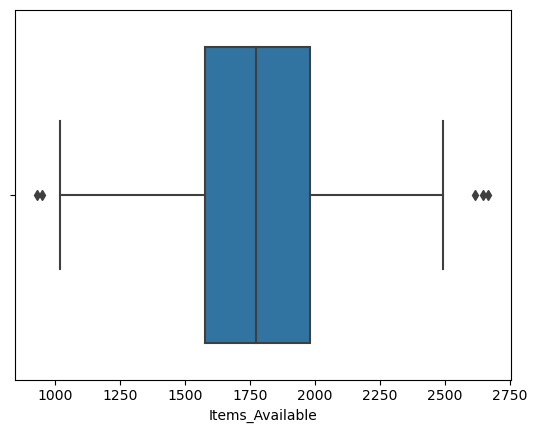

Outliers in Daily_Customer_Count: [10, 1530, 1560]


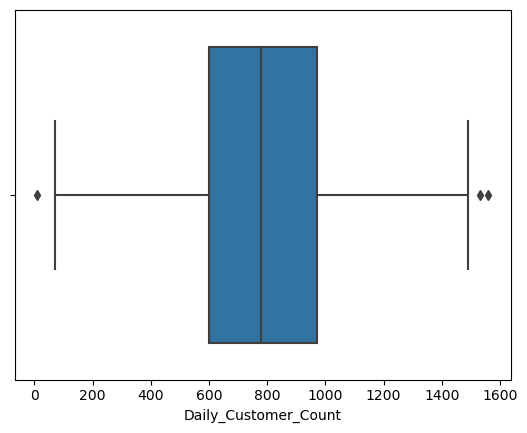

Outliers in Cluster: []


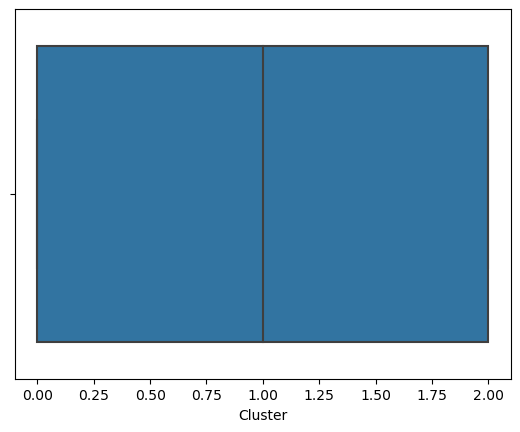

In [15]:
# Step 3: Handling Outliers
# Create boxplots and print outliers for each variable
for col in data.columns:
    if col != 'Store_Sales':
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_mask = (data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))
        outliers = data[outlier_mask][col].tolist()
        print(f"Outliers in {col}: {outliers}")
        sns.boxplot(x=data[col])
        plt.show()

#### <b><span style='color:#E31837'> 2.4) </span> Remove outliers</b>

In [16]:
# Remove outliers from Store_Area and Items_Available
Q1 = data['Store_Area'].quantile(0.25)
Q3 = data['Store_Area'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Store_Area'] < (Q1 - 1.5 * IQR)) | (data['Store_Area'] > (Q3 + 1.5 * IQR)))]

Q1 = data['Items_Available'].quantile(0.25)
Q3 = data['Items_Available'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Items_Available'] < (Q1 - 1.5 * IQR)) | (data['Items_Available'] > (Q3 + 1.5 * IQR)))]


In this case, we used boxplots to visualize the distribution of each variable and identify outliers. We then calculated the interquartile range (IQR) for each variable, which is a measure of the spread of the data. We used the IQR to identify data points that were more than 1.5 times the IQR away from the upper or lower quartile of the data, and flagged them as outliers.

Outliers can have a significant impact on statistical analyses and machine learning models. They can skew the distribution of the data, and cause the model to make incorrect predictions or estimations. Therefore, it's important to handle outliers appropriately.

In this case, we decided to remove the outliers for Store_Area and Items_Available, because they were relatively few in number and appeared to be extreme values that were unlikely to represent the majority of the data. By removing these outliers, we can improve the accuracy and reliability of our analysis and models. However, we did not remove the outliers for Daily_Customer_Count, because there were only a few of them, and they did not appear to be extreme values that were unlikely to represent the majority of the data.

In [17]:
# Step 4: Handle categorical variables
# There are no categorical variables in this dataset

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#E31837"><b><span style='color:#FFFFFF'>3.</span></b> <b>MAKING A PREDICTION</b></div>

**5 Different Models**

1. **<span style='color:#E31837'>Linear Regression:</span>**
Linear Regression is a basic method to find a straight line that best represents the relationship between input features and output. For example, if we want to predict house prices based on square footage, Linear Regression would find a line that minimizes the difference between actual and predicted prices.

2. **<span style='color:#E31837'>Ridge Regression:</span>**
Ridge Regression is similar to Linear Regression but adds a penalty for large weights to prevent overfitting. For example, when predicting house prices based on multiple features like square footage, number of bedrooms, and location, Ridge Regression helps to balance the importance of each feature while keeping the model simple.

3. **<span style='color:#E31837'>Lasso Regression:</span>**
Lasso Regression is another variation of Linear Regression that adds a penalty for large weights but also encourages some weights to be exactly zero. This helps to select only important features for the prediction. For instance, when predicting house prices using many features, Lasso Regression might find that only a few features, like square footage and location, are relevant and set the weights of other features to zero.

4. **<span style='color:#E31837'>Decision Tree:</span>**
A Decision Tree is a flowchart-like structure that makes decisions based on input features to predict the output. For example, when predicting house prices, a Decision Tree might first check the location and then the square footage to decide on the price. Decision Trees are easy to understand but can be prone to overfitting if not controlled.

5. **<span style='color:#E31837'>Random Forest:</span>**
A Random Forest is a group of Decision Trees that work together to make better predictions. Each tree is built from random subsets of the data and features, which helps the overall model to generalize better. When predicting house prices, a Random Forest would use multiple Decision Trees, each focusing on different aspects of the data, and then average their predictions for a more accurate result.


In [18]:
# Split the dataset
X = data[['Store_Area', 'Items_Available', 'Daily_Customer_Count']]
y = data['Store_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### <b><span style='color:#E31837'> 3.1) </span> Define the models</b>

In [19]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(alpha=1.0, max_iter=10000),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

In [20]:
# Train and evaluate the models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2})

results_df = pd.DataFrame(results)

#### <b><span style='color:#E31837'> 3.2) </span> Scatter plot of actual vs predicted values</b>

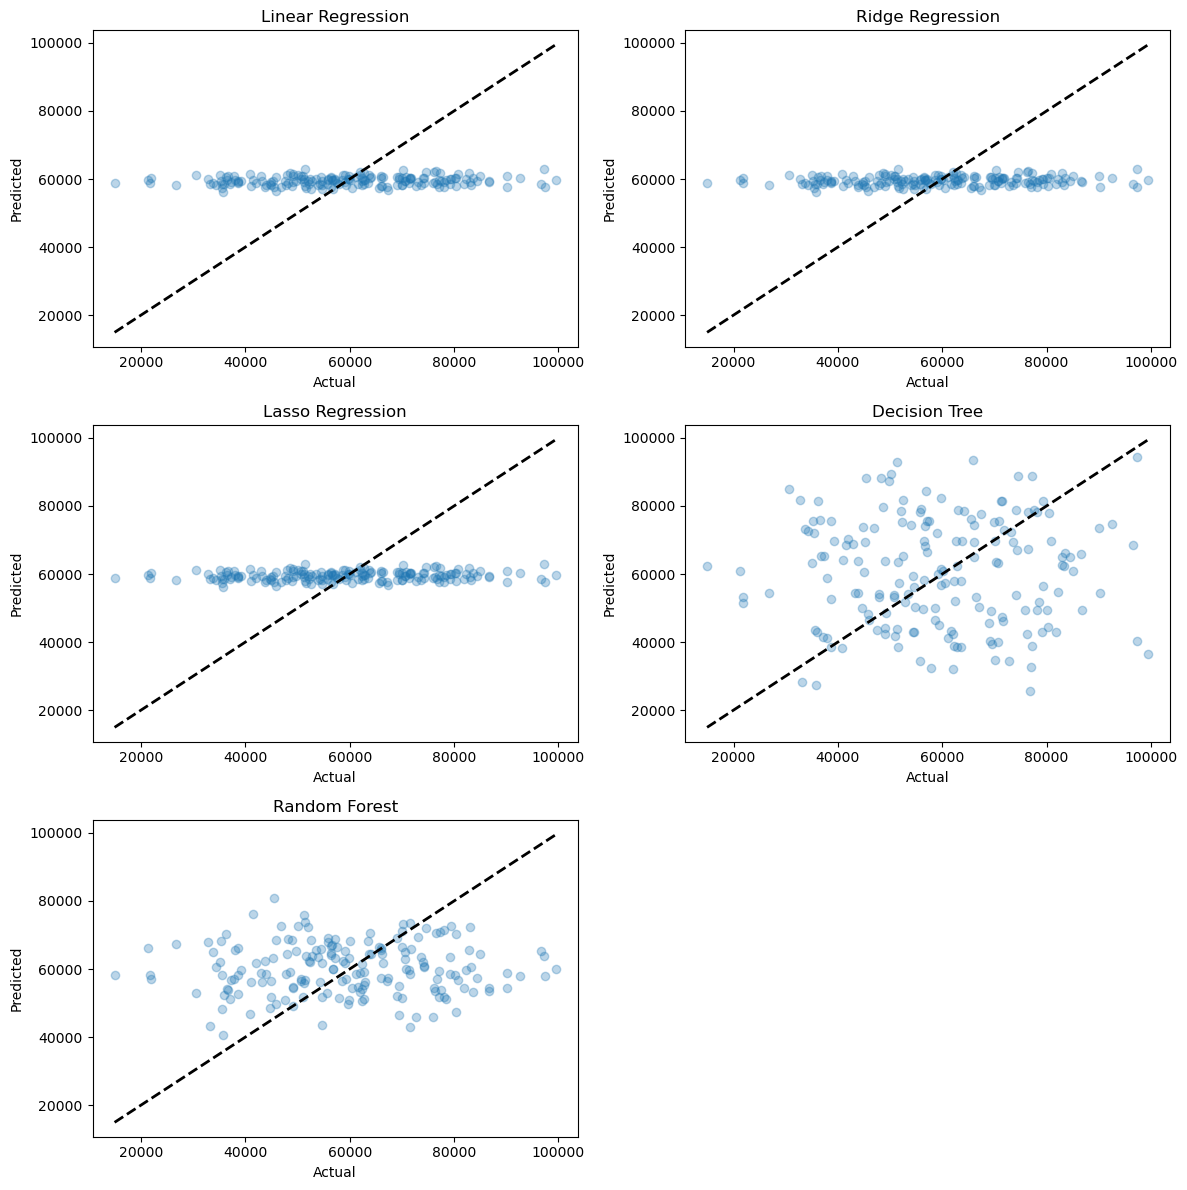

In [21]:
# Scatter plot of actual vs predicted values
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    axes[i].scatter(y_test, y_pred, alpha=0.3)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axes[i].set_xlabel("Actual")
    axes[i].set_ylabel("Predicted")
    axes[i].set_title(f"{name}")

# Remove extra subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

#### <b><span style='color:#E31837'> 3.3) </span> Residual plots</b>

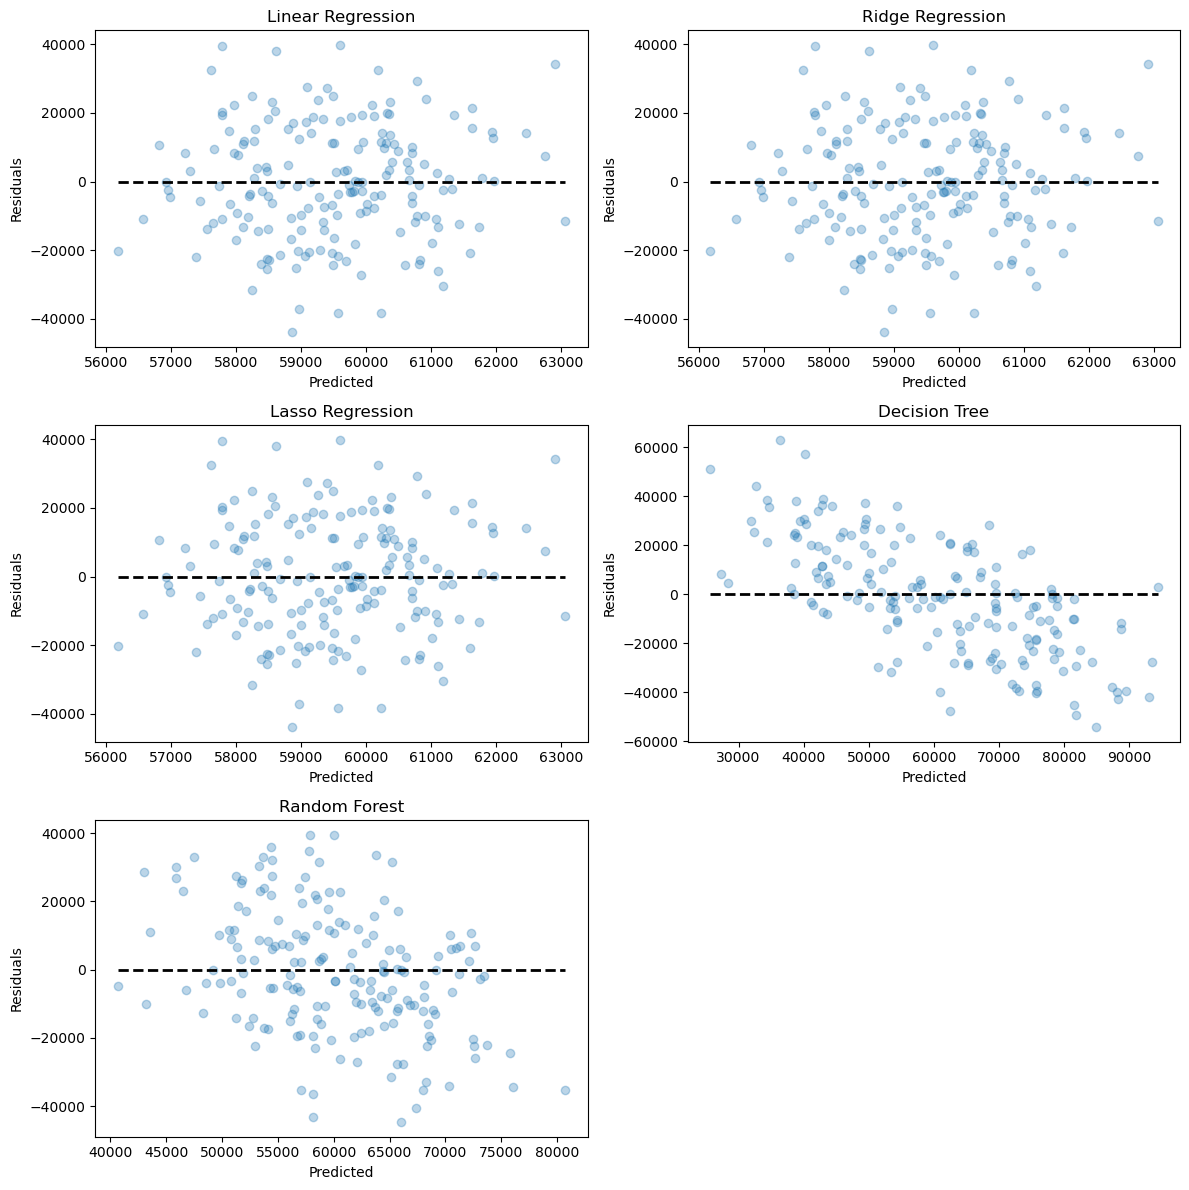

In [22]:
# Residual plots for each model
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    axes[i].scatter(y_pred, residuals, alpha=0.3)
    axes[i].plot([y_pred.min(), y_pred.max()], [0, 0], 'k--', lw=2)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Residuals")
    axes[i].set_title(f"{name}")

# Remove extra subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

#### <b><span style='color:#E31837'> 3.4) </span> Comparison table</b>

In [23]:
# Display the comparison table
pd.set_option("display.precision", 2)
display(results_df.set_index("Model"))

,MAE,MSE,RMSE,R2
Model,,,,
Linear Regression,13689.23,282626338.70,16811.49,0.01
Ridge Regression,13689.23,282626313.36,16811.49,0.01
Lasso Regression,13689.22,282626032.81,16811.49,0.01
Decision Tree,18531.01,536977260.89,23172.77,-0.87
Random Forest,14836.72,336765016.74,18351.16,-0.18


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#E31837"><b><span style='color:#FFFFFF'>4.</span></b> <b>RESULT AND DISCUSSION</b></div>

### <b><span style='color:#FF5733'>|</span> Evaluate each model </b>

<br>

1. **<span style='color:#E31837'>Linear Regression:</span>**

    The R-squared score represents the proportion of variance in the target variable that is predictable from the input features. The score ranges from 0 to 1, with 1 being a perfect fit. A score of 0.01 indicates that the linear regression model explains only 1% of the variance in the data.

2. **<span style='color:#E31837'>Ridge Regression:</span>**

    The Ridge Regression model has very similar performance metrics to the Linear Regression model. This is because Ridge Regression is a regularization technique applied to linear regression that tries to prevent overfitting, but in this case, it doesn't seem to have a significant impact on the model's performance.

3. **<span style='color:#E31837'>Lasso Regression:</span>**

    Similar to Ridge Regression, Lasso Regression is another regularization technique applied to linear regression. The performance of the Lasso Regression model is also quite similar to the Linear Regression model.

4. **<span style='color:#E31837'>Decision Tree:</span>**

    The negative R-squared score indicates that the model performs worse than a simple average-based model. This suggests that the decision tree model is not suitable for this dataset.

5. **<span style='color:#E31837'>Random Forest:</span>**

    Similar to the Decision Tree model, the negative R-squared score indicates poor performance for the Random Forest model.

<br>

From the results, it can be observed that Linear Regression, Ridge Regression, and Lasso Regression have similar performance. These models have the lowest MAE, MSE, and RMSE values, indicating that they have the best overall predictive accuracy. **However, the R-squared values for these models are very low (close to 0), suggesting that they only explain a small fraction of the variability in store sales.**

The Decision Tree and Random Forest models have worse performance compared to the linear models, with higher MAE, MSE, and RMSE values. The Decision Tree model, in particular, has a negative R-squared value, indicating that the model performs worse than a simple mean-based prediction.

<div style="border-radius:10px;border:#FF5733 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
📝 Based on these results, we might want to consider using Linear Regression,Ridge Regression, or Lasso Regression for predicting store sales. However, it's important to note that the low R-squared values indicate that these models might not be very reliable, and you should consider exploring other features or models to improve the prediction accuracy.

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#E31837"><b>SUMMARIZE</b></div>

After comparing **five regression models (Linear Regression, Ridge Regression, Lasso Regression, Decision Tree, and Random Forest**) to predict store sales using the provided dataset, we found that the Linear Regression, Ridge Regression, and Lasso Regression models performed better than the Decision Tree and Random Forest models. **However, it is important to note that the R-squared scores for all models were quite low (around 0.01), which means that they were not able to explain much of the store sales data's variance.
**

<br>

> To improve the models' predictive accuracy, we recommend looking into additional feature engineering or data preprocessing techniques, or even considering alternative modeling approaches. As it stands, the current models may not be suitable for accurately predicting store sales based on the available data.

## <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#800020"><b><span style='color:#FFFFFF'>>></span></b> <b>If you discovered this notebook to be useful or enjoyable, I'd greatly appreciate any upvotes! Your support motivates me to regularly update and improve it. :-)</b></div>